# Visualization Star Wars

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import json
from utils import parsing
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/luiscberrocal/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## Loading data

In [2]:
filename = './data/star_wars_dialogue.pkl'
df = pd.read_pickle(filename)

print(f'Shape: {df.shape}')

df.head()

Shape: (4986, 3)


,character,dialogue,episode
1,THREEPIO,Did you hear that? They've shut down the main...,A New Hope
2,THREEPIO,We're doomed!,A New Hope
3,THREEPIO,There'll be no escape for the Princess this time.,A New Hope
4,THREEPIO,What's that?,A New Hope
5,THREEPIO,I should have known better than to trust the l...,A New Hope


## Line Visualization

### Line counts per Character

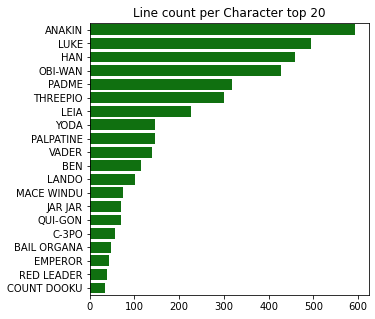

In [5]:
top = 20
character_series = df['character'].value_counts()[:20,]
plt.figure(figsize=(5, 5))
ax = sns.barplot(x=character_series.values, y=character_series.index, color='green')

ax.set_title(f'Line count per Character top {top}')
plt.show()

### Line counts per episode

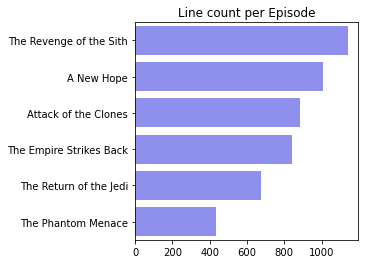

In [7]:
character_series = df['episode'].value_counts()
plt.figure(figsize=(4, 4))
ax = sns.barplot(x=character_series.values, y=character_series.index, color='blue', alpha=0.5)

ax.set_title(f'Line count per Episode')
plt.show()

## Word count

In [12]:
sentence = "Did you hear that? They've shut down the main..."
words = nltk.word_tokenize(sentence)
new_words= [word for word in words if word.isalnum()]
print(words)
print(new_words)

['Did', 'you', 'hear', 'that', '?', 'They', "'ve", 'shut', 'down', 'the', 'main', '...']
['Did', 'you', 'hear', 'that', 'They', 'shut', 'down', 'the', 'main']


In [13]:
def count_words(sentences):
    words = nltk.word_tokenize(sentences)
    new_words= [word for word in words if word.isalnum()]
    return len(new_words)
    
df['word_count'] = df['dialogue'].apply(count_words)

### Word Count per Character

In [35]:
df_char = df.groupby(['character', 'episode'])['word_count'].sum()
df_char.reset_index()
df_char=df_char.sort_values('index', ascending=False)
df_char.head()

character  episode                
ANAKIN     The Revenge of the Sith    2918
OBI-WAN    The Revenge of the Sith    2530
LUKE       A New Hope                 2476
PADME      Attack of the Clones       2377
ANAKIN     Attack of the Clones       2105
Name: word_count, dtype: int64

In [32]:
character_words = df_char[:top]
plt.figure(figsize=(5, 5))
ax = sns.barplot(x='character',  color='green', data=df_char)

ax.set_title(f'Word count per Character top {top}')
plt.show()

ValueError: Could not interpret input 'character'

<Figure size 360x360 with 0 Axes>